# Table of Contents
1. [Import necessary libraries](#import)
2. [Example2](#example2)
3. [Third Example](#third-example)
4. [Fourth Example](#fourth-examplehttpwwwfourthexamplecom)


# 1. Import necessary libraries 
<a id="import"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import seaborn as sns
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer 
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from pprint import pprint
from sklearn.model_selection import train_test_split

# 2 A) Overview of train, test data and target variable

In [3]:
train=pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

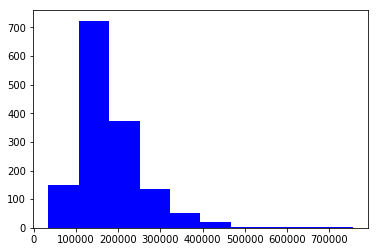

In [4]:
plt.hist(train.SalePrice, color ='blue')
plt.show()
#The data is skewed, hence to normalise it we will use log. Kaggle will also use the same method to evaluate

In [5]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

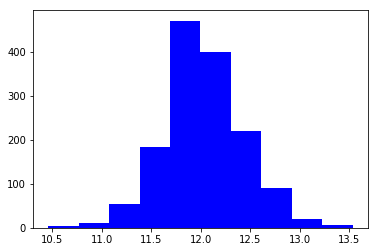

In [6]:
targets=np.log(train.SalePrice)
plt.hist(targets, color='blue')
plt.show()

In [7]:
#Train data set
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
#Numeric Features
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [9]:
#Categorical Features
categoricals = train.select_dtypes(exclude=[np.number])
print(categoricals.dtypes)
categoricals.describe()

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [10]:
#Combining train and test - Feature engg will need to be done on both train and test set
train_copy=train.copy()
train_copy.drop(['SalePrice'], axis=1, inplace=True)
combined=train_copy.append(test)
combined.reset_index(inplace=True)
combined.drop(['index','Id'], axis=1, inplace=True)

# 2 B) Detailed data analysis - Null values and correlation

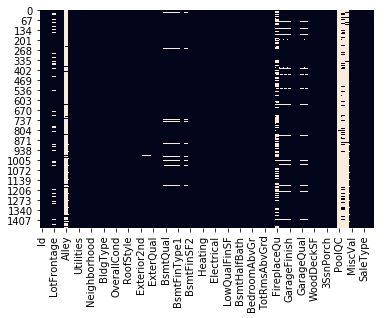

In [11]:
#Null values in the train dataset
sns.heatmap(train.isnull(), cbar=False)

In [12]:
#Correlation
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:5],'\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:],'\n')

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



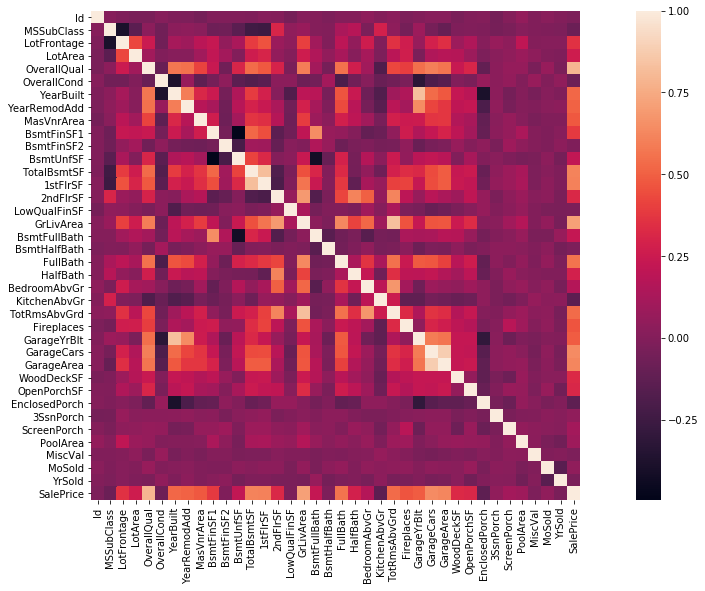

In [13]:
plt.subplots(figsize=(20, 9))
sns.heatmap(corr, square=True)

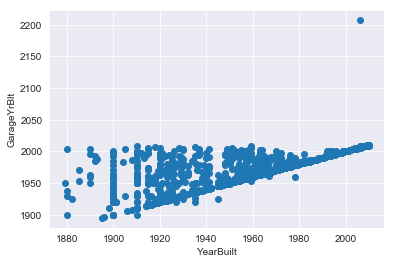

In [81]:
plt.scatter(x=combined['YearBuilt'],y=combined['GarageYrBlt'])
plt.xlabel('YearBuilt')
plt.ylabel('GarageYrBlt')
plt.show()
#Note that in some cases YrBuilt is more than GarageYrBlt, which is impossible! Hence we can assume that
#there was an error in filling the data. Also one point is clearly an outlier. 
#We will tackle the time variables later

## Note: 
### 1.MSSubclass is actually a categorical variable 
### 2.Multicollinearity observed between:
#### a)GarageYrBlt & YearBuilt
#### b)TotRoomsAbvGrd & GrLivArea
#### c)GarageArea & GarageCars
#### d)1stFloorSF & TotalBsmtSF

# 2C) Detailed data analysis - Analysing discrete numeric variables

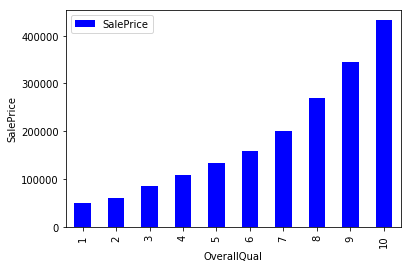

In [14]:
#Quality vs SalePrice - High correlation
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

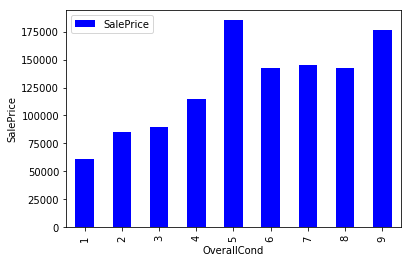

In [15]:
#OverallCond vs SalePrice - Not much correlation
cond_pivot = train.pivot_table(index='OverallCond', values='SalePrice', aggfunc=np.median)
cond_pivot.plot(kind='bar',color='blue')
plt.xlabel('OverallCond')
plt.ylabel('SalePrice')
plt.show()

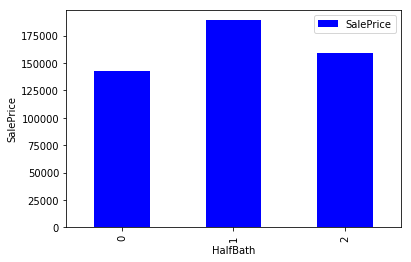

In [16]:
#HalfBath vs SalePrice
halfbath_pivot = train.pivot_table(index='HalfBath', values='SalePrice', aggfunc=np.median)
halfbath_pivot.plot(kind='bar',color='blue')
plt.xlabel('HalfBath')
plt.ylabel('SalePrice')
plt.show()

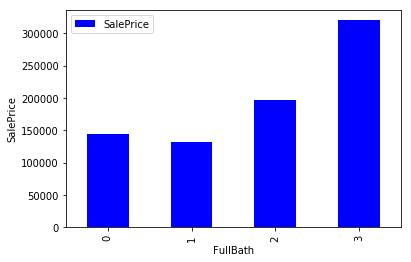

In [17]:
#FullBath vs SalePrice
fullbath_pivot = train.pivot_table(index='FullBath', values='SalePrice', aggfunc=np.median)
fullbath_pivot.plot(kind='bar',color='blue')
plt.xlabel('FullBath')
plt.ylabel('SalePrice')
plt.show()

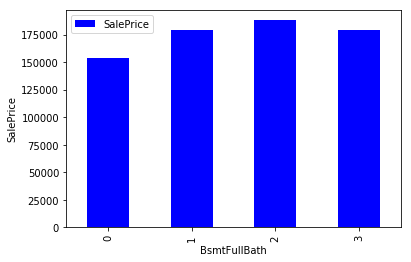

In [18]:
#BsmtFullBath vs SalePrice
BsmtFullBath_pivot = train.pivot_table(index='BsmtFullBath', values='SalePrice', aggfunc=np.median)
BsmtFullBath_pivot.plot(kind='bar',color='blue')
plt.xlabel('BsmtFullBath')
plt.ylabel('SalePrice')
plt.show()

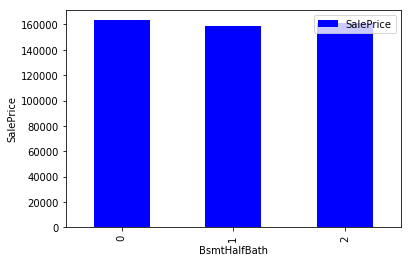

In [19]:
#BsmtHalfBath vs SalePrice
BsmtHalfBath_pivot = train.pivot_table(index='BsmtHalfBath', values='SalePrice', aggfunc=np.median)
BsmtHalfBath_pivot.plot(kind='bar',color='blue')
plt.xlabel('BsmtHalfBath')
plt.ylabel('SalePrice')
plt.show()

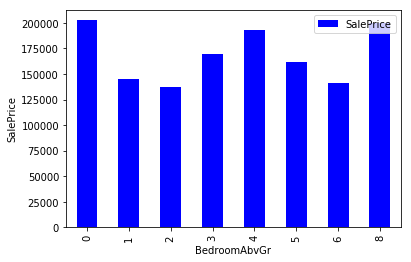

In [20]:
#BedroomAbvGr vs SalesPrice
BedroomAbvGr_pivot = train.pivot_table(index='BedroomAbvGr', values='SalePrice', aggfunc=np.median)
BedroomAbvGr_pivot.plot(kind='bar',color='blue')
plt.xlabel('BedroomAbvGr')
plt.ylabel('SalePrice')
plt.show()

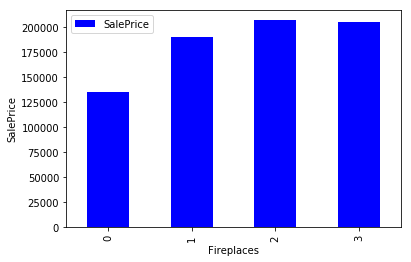

In [21]:
#Fireplaces vs SalePrice
Fireplaces_pivot = train.pivot_table(index='Fireplaces', values='SalePrice', aggfunc=np.median)
Fireplaces_pivot.plot(kind='bar',color='blue')
plt.xlabel('Fireplaces')
plt.ylabel('SalePrice')
plt.show()

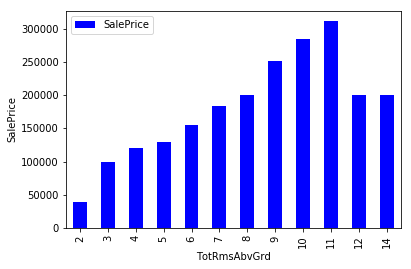

In [22]:
#TotRmsAbvGrd vs SalePrice
TotRmsAbvGrd_pivot = train.pivot_table(index='TotRmsAbvGrd', values='SalePrice', aggfunc=np.median)
TotRmsAbvGrd_pivot.plot(kind='bar',color='blue')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.show()

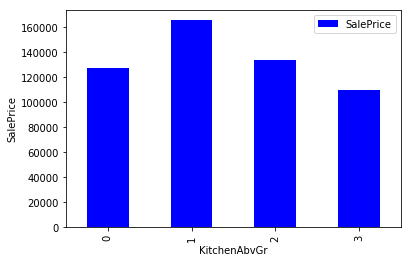

In [23]:
#KitchenAbvGr vs SalePrice
KitchenAbvGr_pivot = train.pivot_table(index='KitchenAbvGr', values='SalePrice', aggfunc=np.median)
KitchenAbvGr_pivot.plot(kind='bar',color='blue')
plt.xlabel('KitchenAbvGr')
plt.ylabel('SalePrice')
plt.show()

# 2 D) Detailed data analysis - Analysing continuous numeric variables

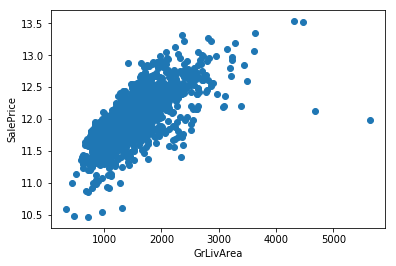

In [24]:
#GrLivArea Vs SalePrice
plt.scatter(x=train['GrLivArea'],y=targets)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

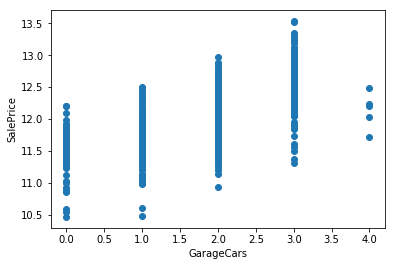

In [25]:
#GarageCars vs SalePrice
plt.scatter(x=train['GarageCars'],y=targets)
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.show()

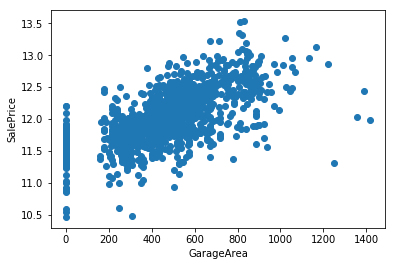

In [26]:
#GarageArea vs SalePrice
plt.scatter(x=train['GarageArea'],y=targets)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


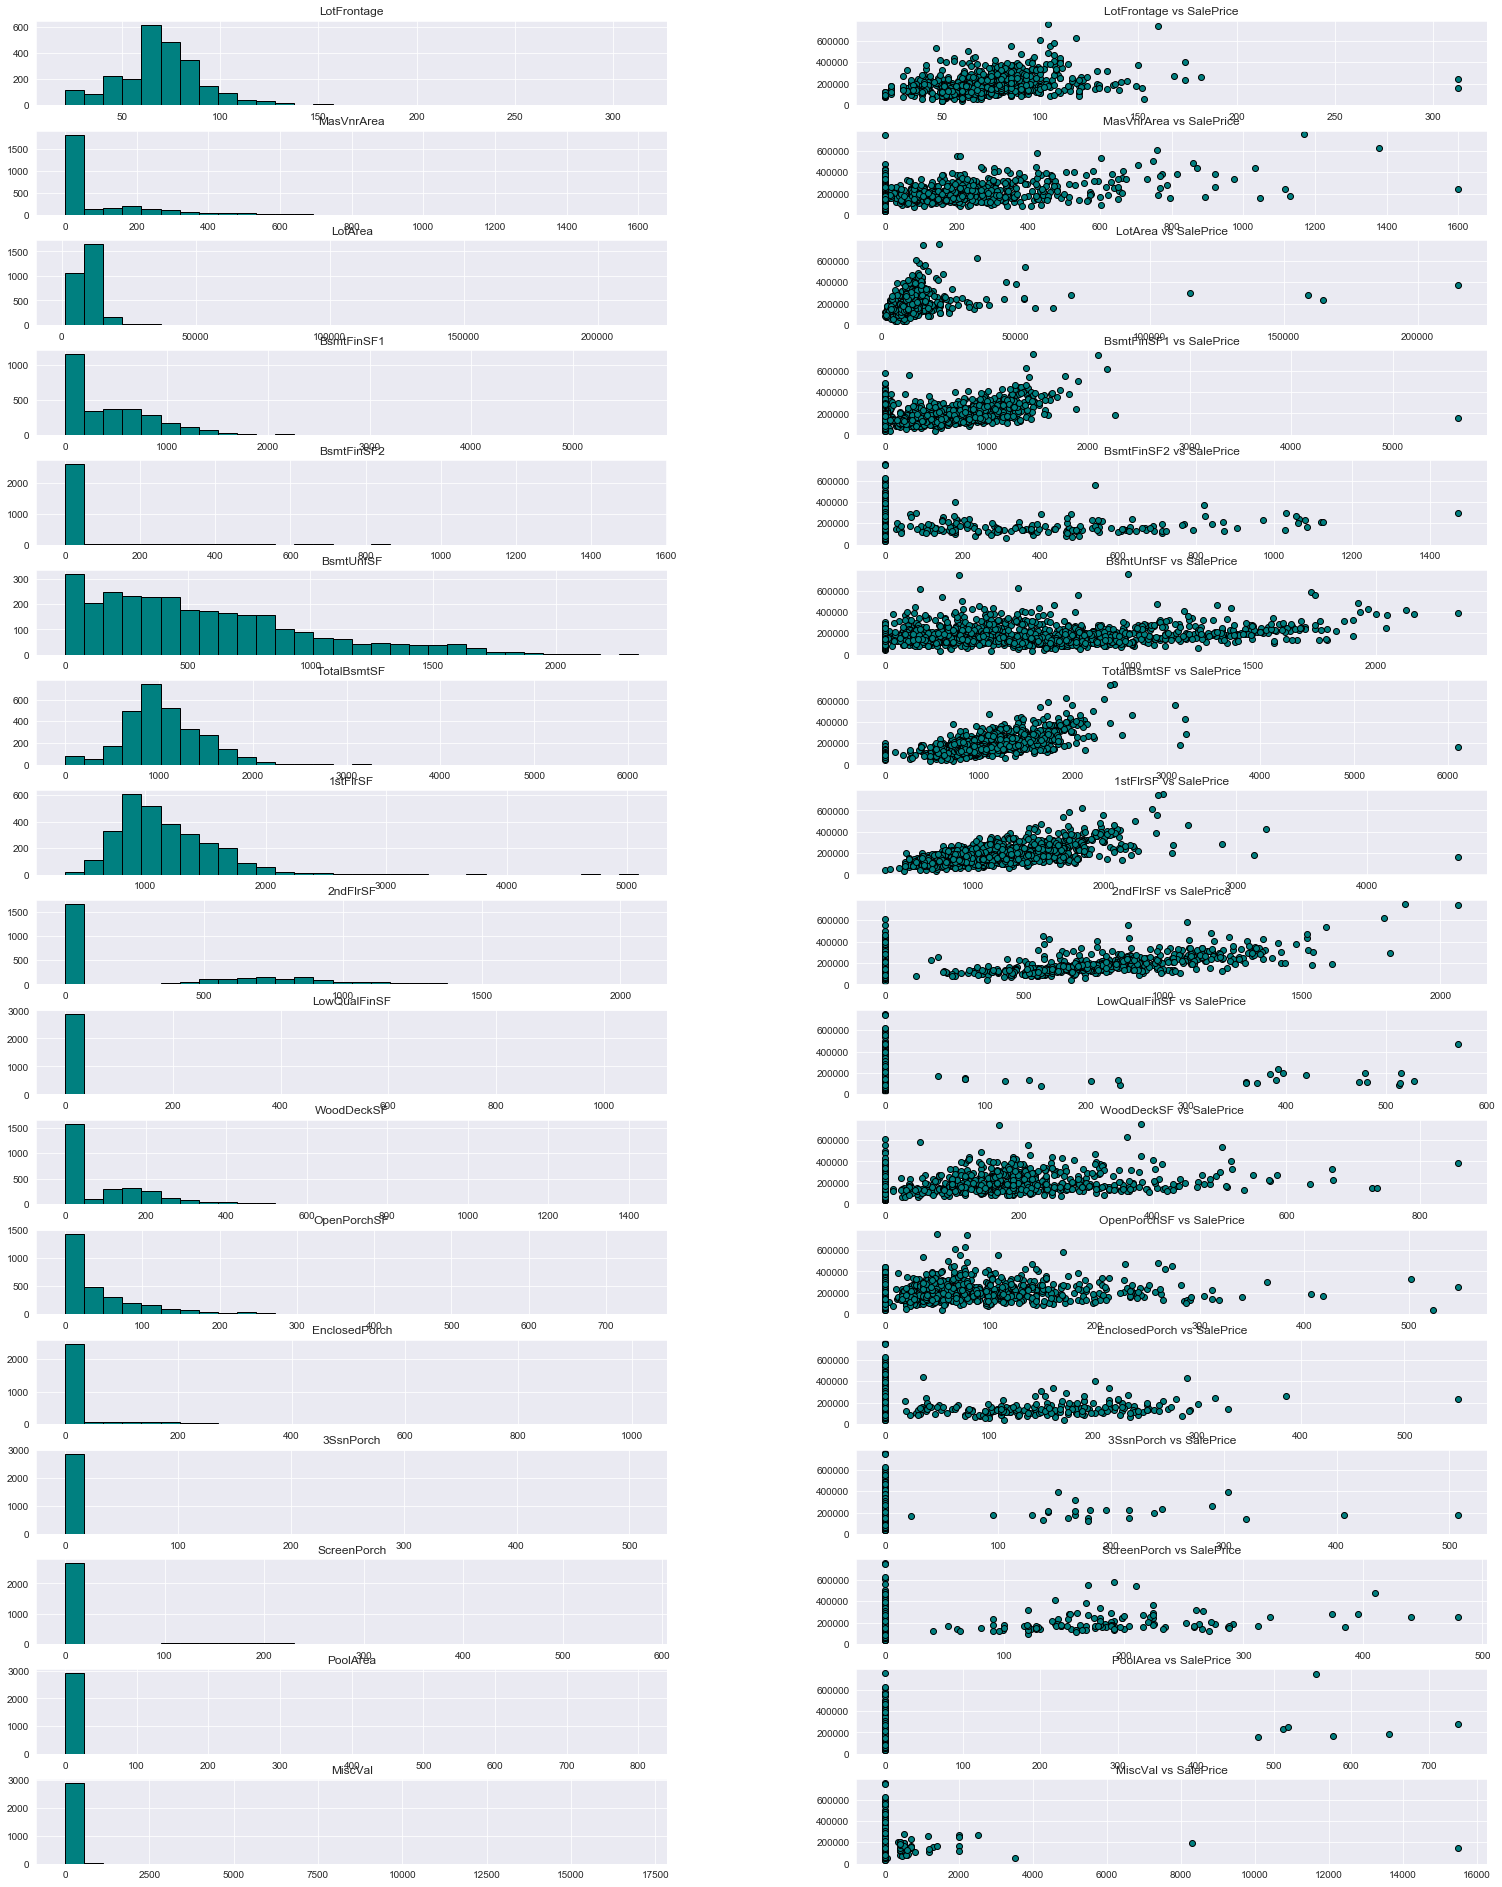

In [27]:
sns.set_style('darkgrid')
plt.figure(figsize=(26,32))
plt.subplot(17,2,1)
plt.tight_layout()
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)
plt.hist(combined['LotFrontage'], bins=30, edgecolor= 'black',color ='teal')
plt.title('LotFrontage')

plt.subplot(17,2,2)
plt.scatter(x=train.LotFrontage, y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('LotFrontage vs SalePrice')

plt.subplot(17,2,3)
plt.hist(combined['MasVnrArea'], bins=30, edgecolor= 'black',color ='teal')
plt.title('MasVnrArea')

plt.subplot(17,2,4)
plt.scatter(x=train.MasVnrArea, y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('MasVnrArea vs SalePrice')

plt.subplot(17,2,5)
plt.hist(combined['LotArea'], bins=30, edgecolor= 'black',color ='teal')
plt.title('LotArea')

plt.subplot(17,2,6)
plt.scatter(x=train.LotArea, y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('LotArea vs SalePrice')

plt.subplot(17,2,7)
plt.hist(combined['BsmtFinSF1'], bins=30, edgecolor= 'black',color ='teal')
plt.title('BsmtFinSF1')

plt.subplot(17,2,8)
plt.scatter(x=train.BsmtFinSF1, y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('BsmtFinSF1 vs SalePrice')

plt.subplot(17,2,9)
plt.hist(combined['BsmtFinSF2'], bins=30, edgecolor= 'black',color ='teal')
plt.title('BsmtFinSF2')

plt.subplot(17,2,10)
plt.scatter(x=train.BsmtFinSF2, y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('BsmtFinSF2 vs SalePrice')

plt.subplot(17,2,11)
plt.hist(combined['BsmtUnfSF'], bins=30, edgecolor= 'black',color ='teal')
plt.title('BsmtUnfSF')

plt.subplot(17,2,12)
plt.scatter(x=train.BsmtUnfSF, y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('BsmtUnfSF vs SalePrice')

plt.subplot(17,2,13)
plt.hist(combined['TotalBsmtSF'], bins=30, edgecolor= 'black',color ='teal')
plt.title('TotalBsmtSF')

plt.subplot(17,2,14)
plt.scatter(x=train.TotalBsmtSF, y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('TotalBsmtSF vs SalePrice')

plt.subplot(17,2,15)
plt.hist(combined['1stFlrSF'], bins=30, edgecolor= 'black',color ='teal')
plt.title('1stFlrSF')

plt.subplot(17,2,16)
plt.scatter(x=train['1stFlrSF'], y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('1stFlrSF vs SalePrice')

plt.subplot(17,2,17)
plt.hist(combined['2ndFlrSF'], bins=30, edgecolor= 'black',color ='teal')
plt.title('2ndFlrSF')

plt.subplot(17,2,18)
plt.scatter(x=train['2ndFlrSF'], y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('2ndFlrSF vs SalePrice')

plt.subplot(17,2,19)
plt.hist(combined['LowQualFinSF'], bins=30, edgecolor= 'black',color ='teal')
plt.title('LowQualFinSF')

plt.subplot(17,2,20)
plt.scatter(x=train['LowQualFinSF'], y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('LowQualFinSF vs SalePrice')

plt.subplot(17,2,21)
plt.hist(combined['WoodDeckSF'], bins=30, edgecolor= 'black',color ='teal')
plt.title('WoodDeckSF')

plt.subplot(17,2,22)
plt.scatter(x=train['WoodDeckSF'], y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('WoodDeckSF vs SalePrice')

plt.subplot(17,2,23)
plt.hist(combined['OpenPorchSF'], bins=30, edgecolor= 'black',color ='teal')
plt.title('OpenPorchSF')

plt.subplot(17,2,24)
plt.scatter(x=train['OpenPorchSF'], y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('OpenPorchSF vs SalePrice')

plt.subplot(17,2,25)
plt.hist(combined['EnclosedPorch'], bins=30, edgecolor= 'black',color ='teal')
plt.title('EnclosedPorch')

plt.subplot(17,2,26)
plt.scatter(x=train['EnclosedPorch'], y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('EnclosedPorch vs SalePrice')

plt.subplot(17,2,27)
plt.hist(combined['3SsnPorch'], bins=30, edgecolor= 'black',color ='teal')
plt.title('3SsnPorch')

plt.subplot(17,2,28)
plt.scatter(x=train['3SsnPorch'], y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('3SsnPorch vs SalePrice')

plt.subplot(17,2,29)
plt.hist(combined['ScreenPorch'], bins=30, edgecolor= 'black',color ='teal')
plt.title('ScreenPorch')

plt.subplot(17,2,30)
plt.scatter(x=train['ScreenPorch'], y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('ScreenPorch vs SalePrice')

plt.subplot(17,2,31)
plt.hist(combined['PoolArea'], bins=30, edgecolor= 'black',color ='teal')
plt.title('PoolArea')

plt.subplot(17,2,32)
plt.scatter(x=train['PoolArea'], y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('PoolArea vs SalePrice')

plt.subplot(17,2,33)
plt.hist(combined['MiscVal'], bins=30, edgecolor= 'black',color ='teal')
plt.title('MiscVal')

plt.subplot(17,2,34)
plt.scatter(x=train['MiscVal'], y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('MiscVal vs SalePrice')

plt.show()

# Observed Outliers
### LotFrontage > 300
### GarageArea > 1200
### GarageCars > 3.5
### LotFrontage > 300
### MasVnrArea > 1500
### BsmtFinSF2 > 5000
### 1stFlrSF > 4000

# 2E) Detailed data analysis - Analysing continuous numeric variables

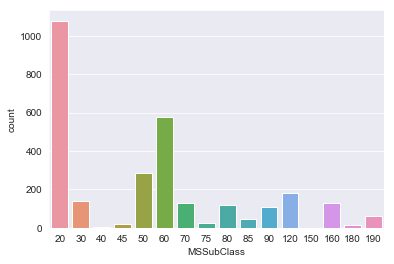

Text(0.5, 1.0, 'Sale Price by MSSubclass')

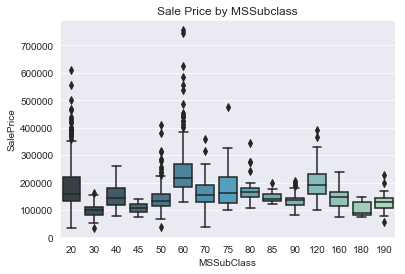

In [29]:
#MSSubClass
sns.countplot(combined.MSSubClass)
plt.show()
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by MSSubclass')
#Note correlation seems to be very less with Sale Price

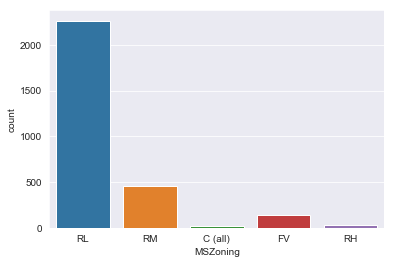

Text(0.5, 1.0, 'Sale Price by MSZoning')

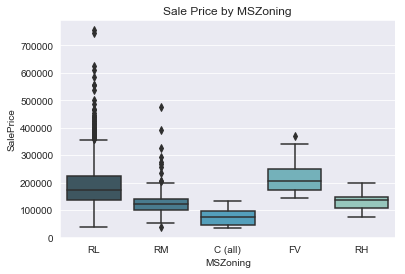

In [30]:
#MSZoning
sns.countplot(combined.MSZoning)
plt.show()
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by MSZoning')

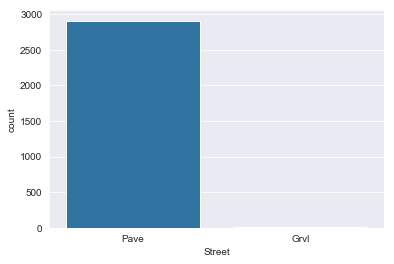

Text(0.5, 1.0, 'Sale Price by Street')

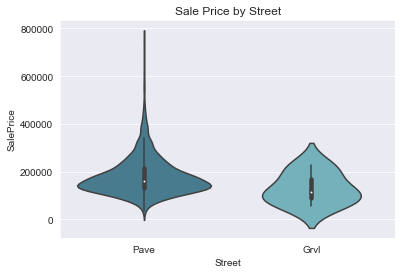

In [32]:
#Street
sns.countplot(combined.Street)
plt.show()
sns.violinplot(x = 'Street', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Street')

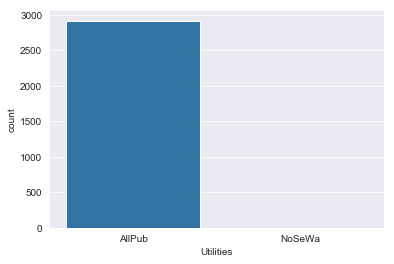

In [33]:
#Utilities
sns.countplot(combined.Utilities) #Entire column can be deleted

Text(0.5, 1.0, 'Sale Price by Foundation')

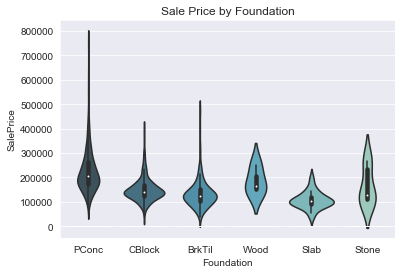

In [34]:
#Foundation
sns.countplot(combined.Foundation)
sns.violinplot(x = 'Foundation', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Foundation')

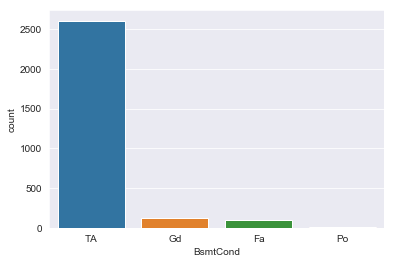

Text(0.5, 1.0, 'Sale Price by BsmtCond')

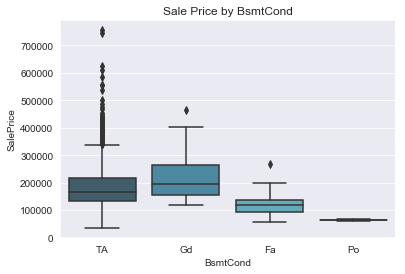

In [35]:
#BsmtCond
sns.countplot(combined.BsmtCond)
plt.show()
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by BsmtCond')

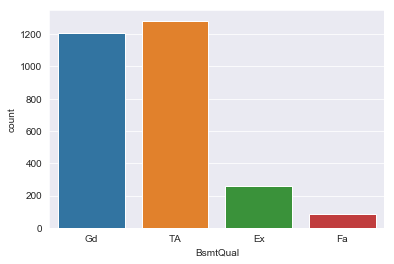

Text(0.5, 1.0, 'Sale Price by BsmtCond')

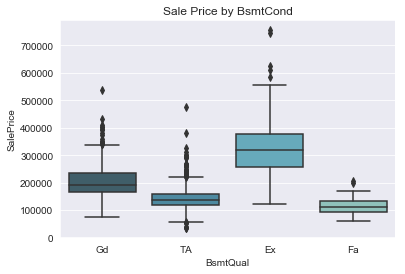

In [36]:
#BsmtQual
sns.countplot(combined.BsmtQual)
plt.show()
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by BsmtCond')

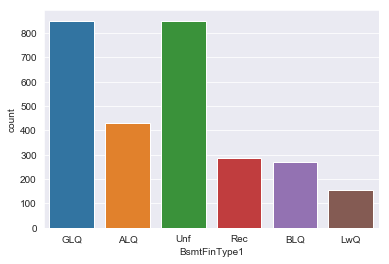

Text(0.5, 1.0, 'Sale Price by BsmtFinType1')

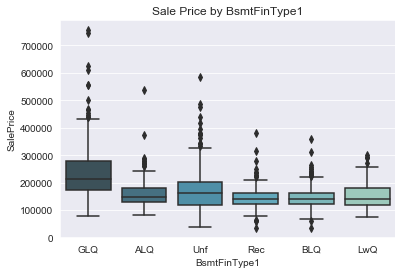

In [37]:
#BsmtFinType1
sns.countplot(combined.BsmtFinType1)
plt.show()
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by BsmtFinType1')

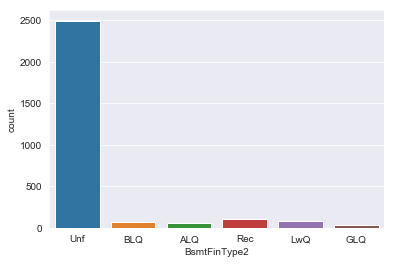

Text(0.5, 1.0, 'Sale Price by BsmtFinType2')

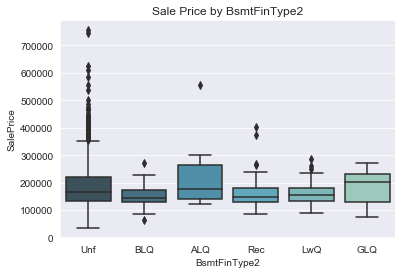

In [38]:
#BsmtFinType2
sns.countplot(combined.BsmtFinType2)
plt.show()
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by BsmtFinType2')
#Majority is unfinished with clearly no impact on Sale Price

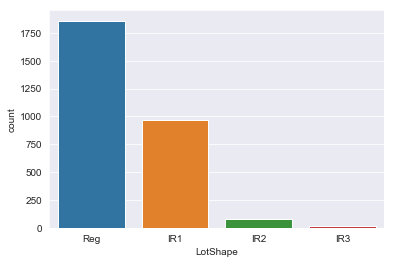

Text(0.5, 1.0, 'Sale Price by LotShape')

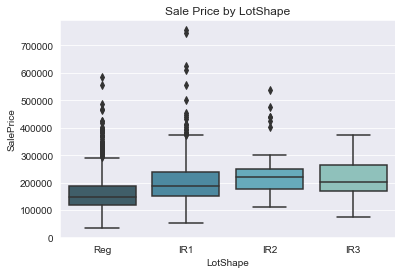

In [40]:
#LotShape 
sns.countplot(combined.LotShape)
plt.show()
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by LotShape')

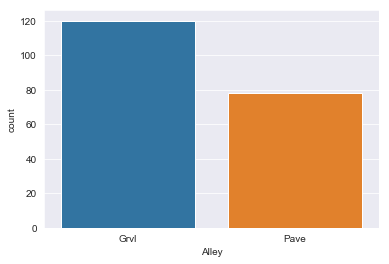

Text(0.5, 1.0, 'Sale Price by Alley')

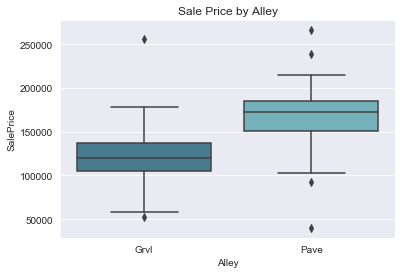

In [42]:
#Alley - Can conclude that paved alley leads to much higher prices than gravel
sns.countplot(combined.Alley)
plt.show()
sns.boxplot(x = 'Alley', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Alley')

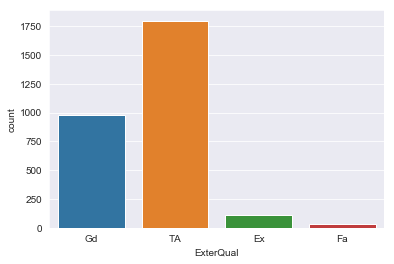

Text(0.5, 1.0, 'Sale Price by ExterQual')

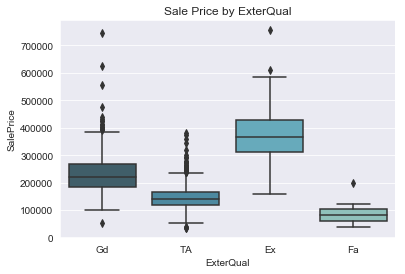

In [43]:
#ExterQual
sns.countplot(combined.ExterQual)
plt.show()
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by ExterQual')

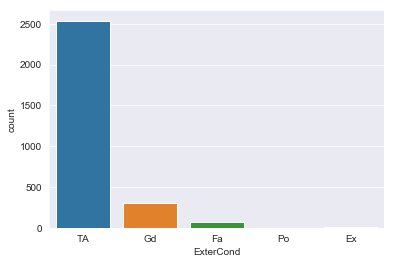

Text(0.5, 1.0, 'Sale Price by ExterCond')

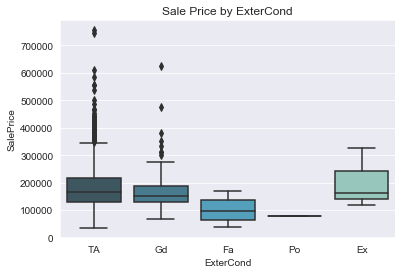

In [44]:
#ExterCond
sns.countplot(combined.ExterCond)
plt.show()
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by ExterCond')
#Note most are TA, hardly any correlation in the data

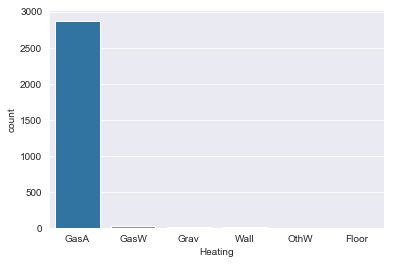

Text(0.5, 1.0, 'Sale Price by Heating')

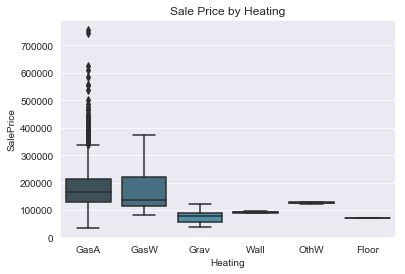

In [45]:
#Heating
sns.countplot(combined.Heating)
plt.show()
sns.boxplot(x = 'Heating', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Heating')
#Again data dominated by one category

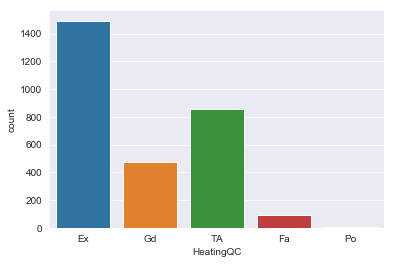

Text(0.5, 1.0, 'Sale Price by HeatingQC')

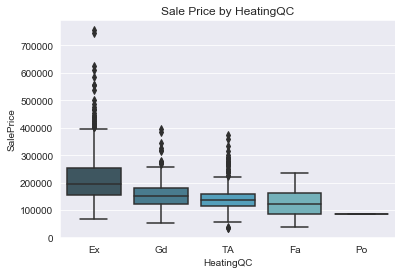

In [46]:
#HeatingQC
sns.countplot(combined.HeatingQC)
plt.show()
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by HeatingQC')

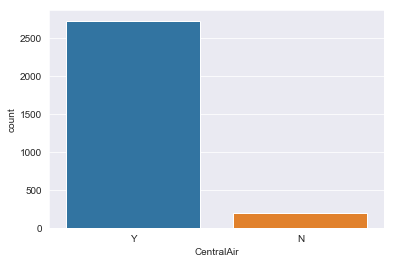

Text(0.5, 1.0, 'Sale Price by HeatingQC')

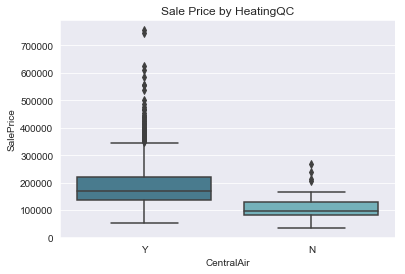

In [47]:
#CentralAir
sns.countplot(combined.CentralAir)
plt.show()
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by HeatingQC')

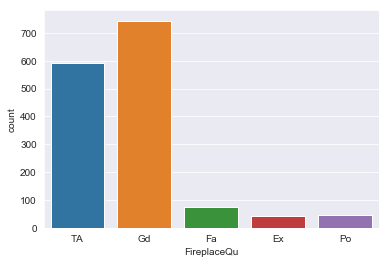

Text(0.5, 1.0, 'Sale Price by FireplaceQu')

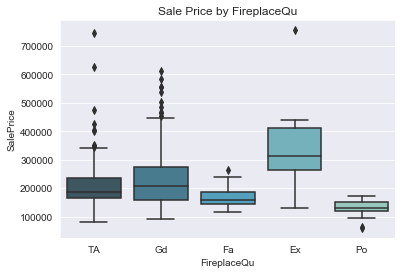

In [48]:
#FireplaceQu
sns.countplot(combined.FireplaceQu)
plt.show()
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by FireplaceQu')

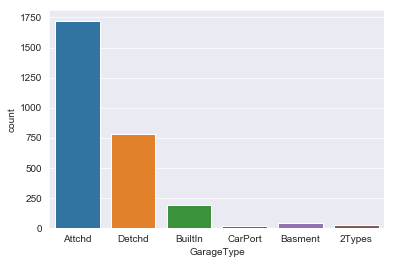

Text(0.5, 1.0, 'Sale Price by GarageType')

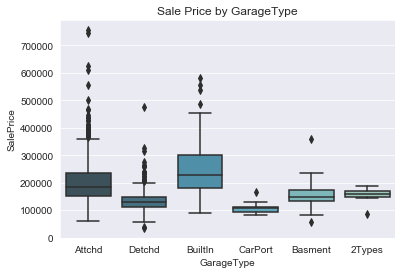

In [49]:
#GarageType
sns.countplot(combined.GarageType)
plt.show()
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by GarageType')

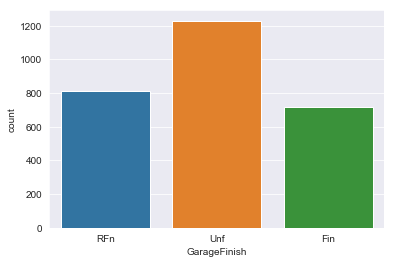

Text(0.5, 1.0, 'Sale Price by GarageFinish')

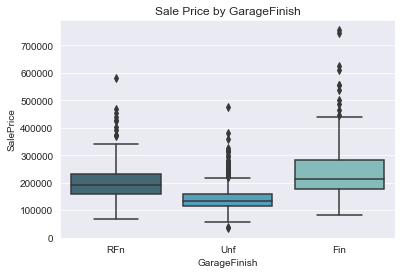

In [50]:
#GarageFinish
sns.countplot(combined.GarageFinish)
plt.show()
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by GarageFinish')

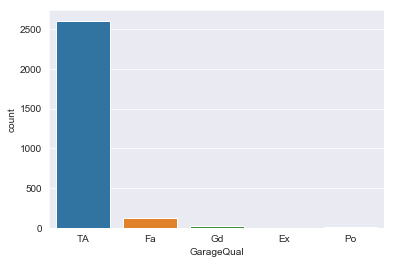

Text(0.5, 1.0, 'Sale Price by GarageQual')

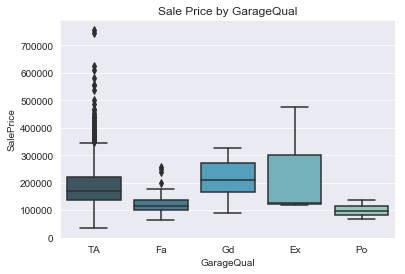

In [52]:
#GarageQual
sns.countplot(combined.GarageQual)
plt.show()
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by GarageQual')

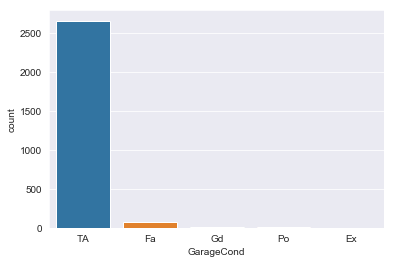

Text(0.5, 1.0, 'Sale Price by GarageCond')

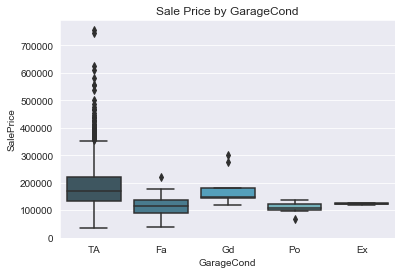

In [53]:
#GarageCond
sns.countplot(combined.GarageCond)
plt.show()
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by GarageCond')

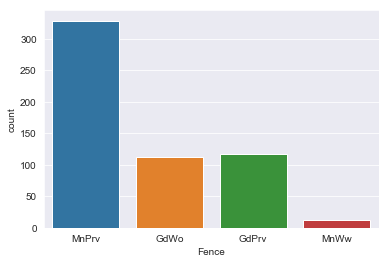

Text(0.5, 1.0, 'Sale Price by Fence')

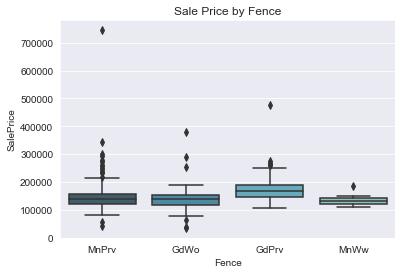

In [54]:
#Fence
sns.countplot(combined.Fence)
plt.show()
sns.boxplot(x = 'Fence', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Fence')

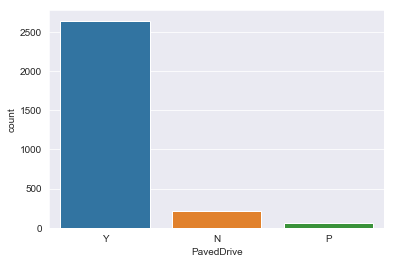

Text(0.5, 1.0, 'Sale Price by PavedDrive')

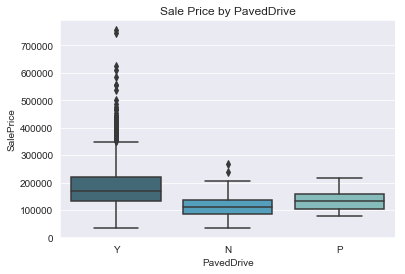

In [55]:
#PavedDrive
sns.countplot(combined.PavedDrive)
plt.show()
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by PavedDrive')

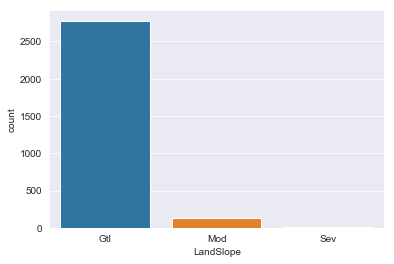

Text(0.5, 1.0, 'Sale Price by LandSlope')

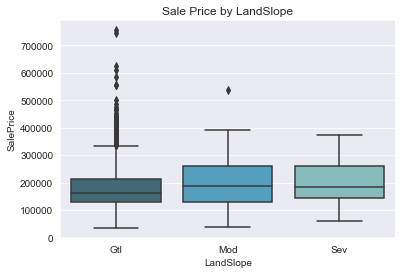

In [57]:
#LandSlope
sns.countplot(combined.LandSlope)
plt.show()
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by LandSlope')
#Not much corelation here!

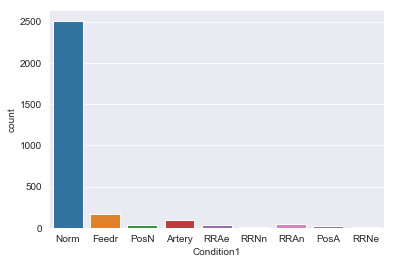

Text(0.5, 1.0, 'Sale Price by Condition1')

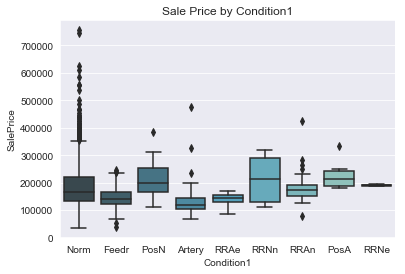

In [58]:
#Condition1
sns.countplot(combined.Condition1)
plt.show()
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Condition1')

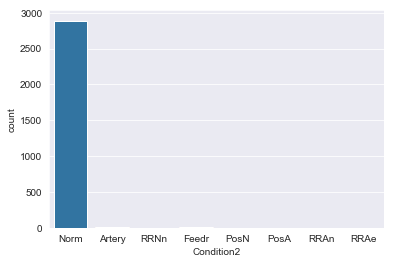

Text(0.5, 1.0, 'Sale Price by Condition2')

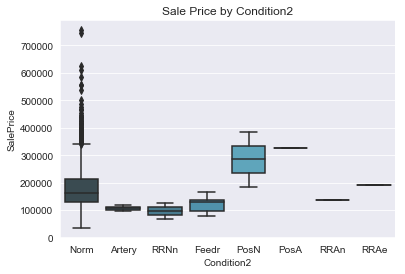

In [61]:
#Condition2
sns.countplot(combined.Condition2)
plt.show()
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Condition2')

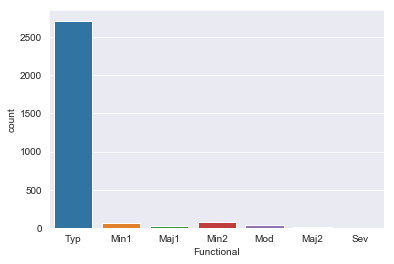

Text(0.5, 1.0, 'Sale Price by Fuctional')

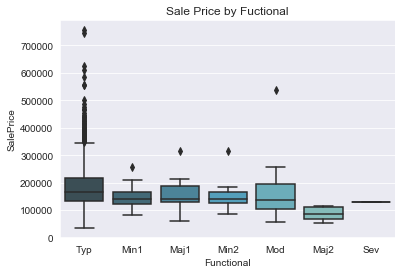

In [62]:
#Functional
sns.countplot(combined.Functional)
plt.show()
sns.boxplot(x = 'Functional', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Fuctional')

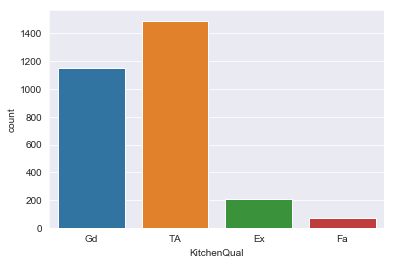

Text(0.5, 1.0, 'Sale Price by KitchenQual')

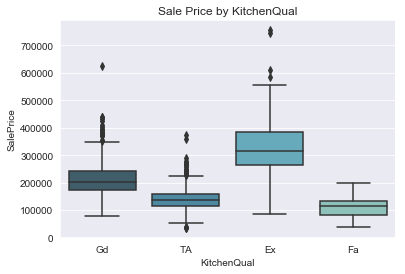

In [63]:
#KitchenQual
sns.countplot(combined.KitchenQual)
plt.show()
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by KitchenQual')

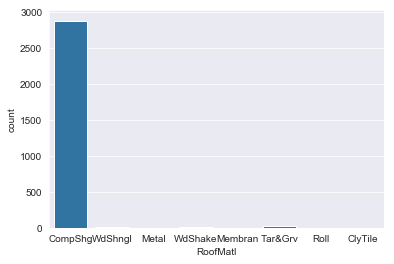

Text(0.5, 1.0, 'Sale Price by RoofMatl')

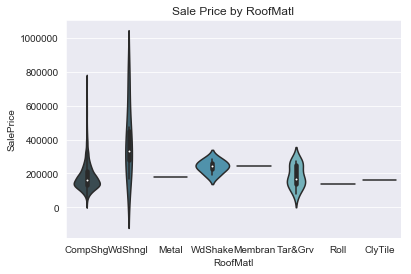

In [64]:
#RoofMatl
sns.countplot(combined.RoofMatl)
plt.show()
sns.violinplot(x = 'RoofMatl', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by RoofMatl')
#Important indicator of SalePrice

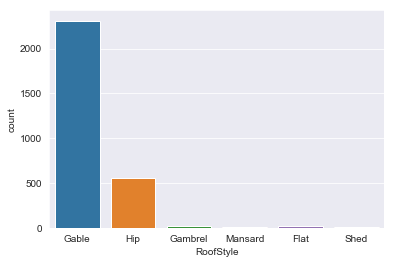

Text(0.5, 1.0, 'Sale Price by RoofStyle')

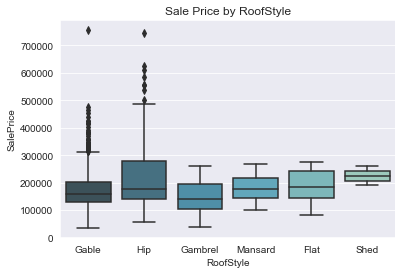

In [65]:
#RoofStyle
sns.countplot(combined.RoofStyle)
plt.show()
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by RoofStyle')

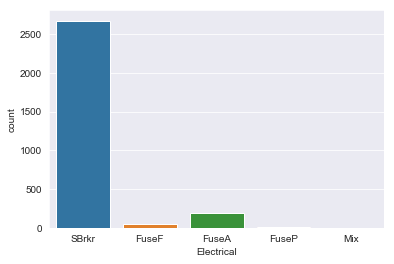

Text(0.5, 1.0, 'Sale Price by Electrical')

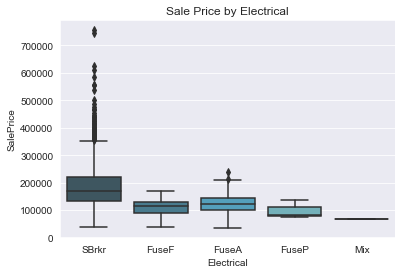

In [66]:
#Electrical
sns.countplot(combined.Electrical)
plt.show()
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Electrical')

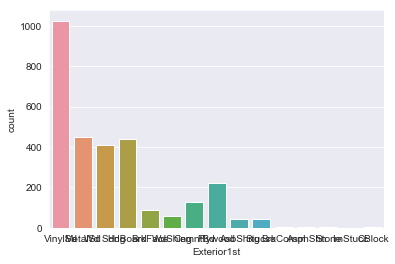

Text(0.5, 1.0, 'Sale Price by Exterior1st')

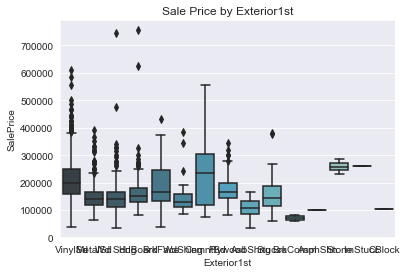

In [67]:
#Exterior1st
sns.countplot(combined.Exterior1st)
plt.show()
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Exterior1st')

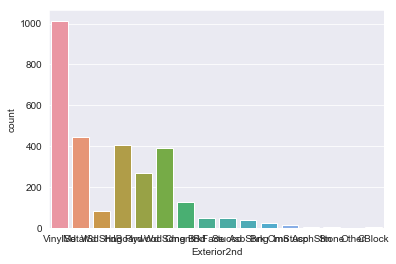

Text(0.5, 1.0, 'Sale Price by Exterior2nd')

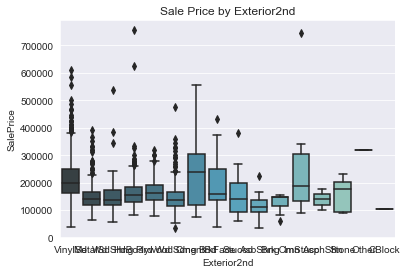

In [68]:
#Exterior2nd
sns.countplot(combined.Exterior2nd)
plt.show()
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Exterior2nd')

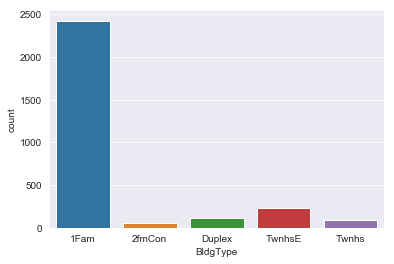

Text(0.5, 1.0, 'Sale Price by BldgType')

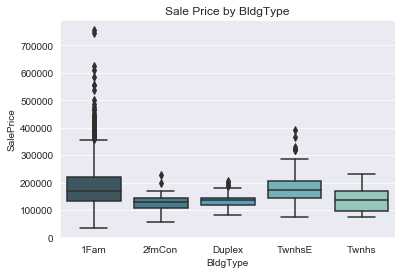

In [69]:
#BldgType
sns.countplot(combined.BldgType) 
plt.show()
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by BldgType')

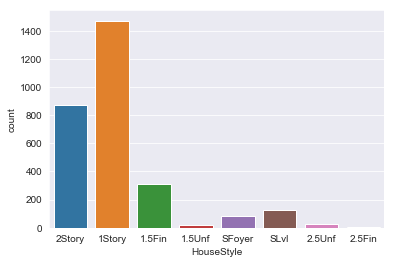

Text(0.5, 1.0, 'Sale Price by HouseStyle')

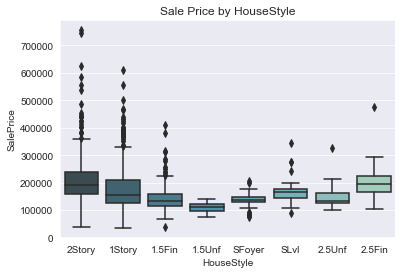

In [70]:
#HouseStyle
sns.countplot(combined.HouseStyle)
plt.show()
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by HouseStyle')

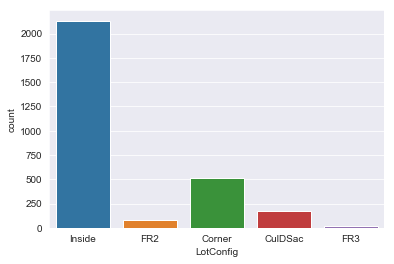

Text(0.5, 1.0, 'Sale Price by LotConfig')

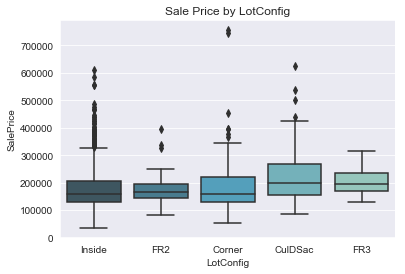

In [71]:
#LotConfig
sns.countplot(combined.LotConfig)
plt.show()
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by LotConfig')

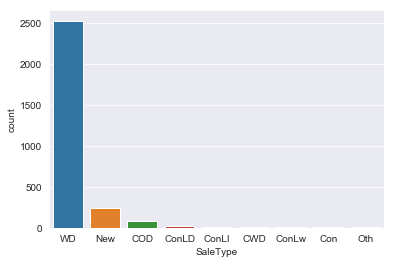

Text(0.5, 1.0, 'Sale Price by SaleType')

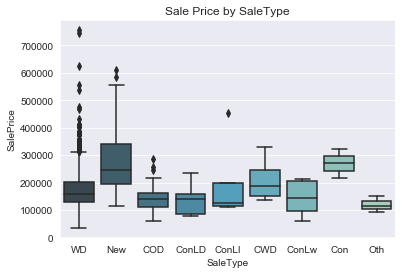

In [72]:
#SaleType
sns.countplot(combined.SaleType)
plt.show()
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by SaleType')

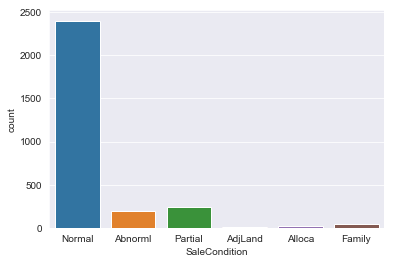

Text(0.5, 1.0, 'Sale Price by SaleCondition')

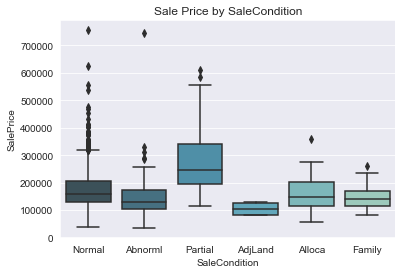

In [73]:
#SaleCondition
sns.countplot(combined.SaleCondition)
plt.show()
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by SaleCondition')

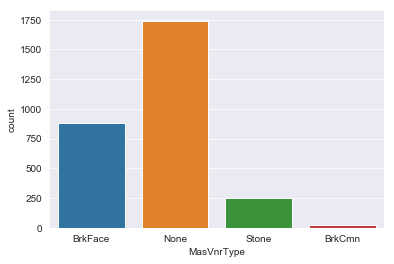

Text(0.5, 1.0, 'Sale Price by MasVnrType')

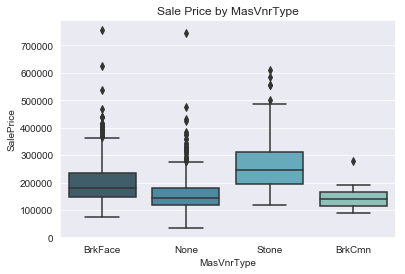

In [74]:
#MasVnrType
sns.countplot(combined.MasVnrType)
plt.show()
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by MasVnrType')

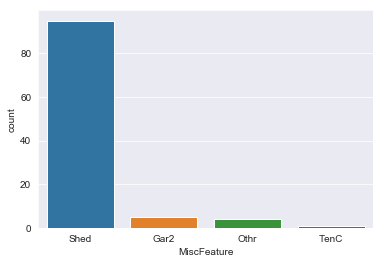

Text(0.5, 1.0, 'Sale Price by MiscFeature')

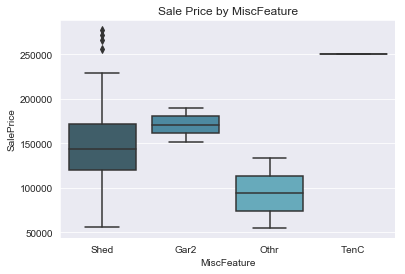

In [75]:
#MiscFeature
sns.countplot(combined.MiscFeature)
plt.show()
sns.boxplot(x = 'MiscFeature', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by MiscFeature')

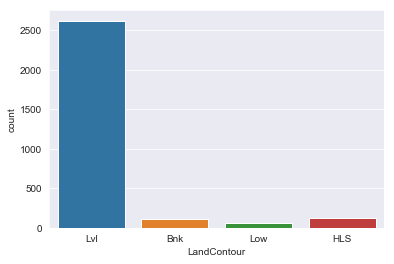

Text(0.5, 1.0, 'Sale Price by LandContour')

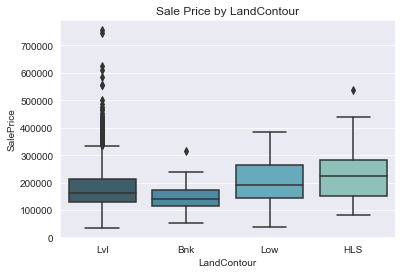

In [76]:
#LandContour
sns.countplot(combined.LandContour)
plt.show()
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by LandContour')

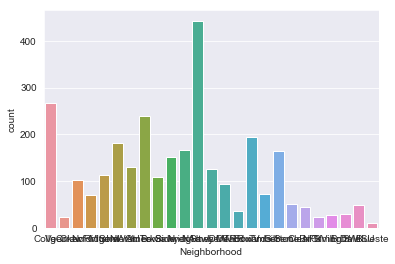

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

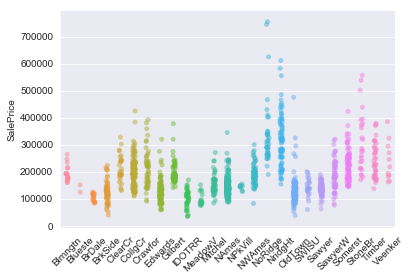

In [79]:
#Neighborhood
sns.countplot(combined.Neighborhood)
plt.show()
sns.stripplot(x = train.Neighborhood.values, y = train.SalePrice,
              order = np.sort(train.Neighborhood.unique()),
              jitter=0.1, alpha=0.5)
 
plt.xticks(rotation=45)

# 3A) Data Transformation - Removing Outliers 

In [80]:
#Outliers
index_drop = combined[:1461].GrLivArea[combined[:1461].GrLivArea>4000].index
index_drop = np.append(index_drop, combined[:1461].GarageArea[combined[:1461].GarageArea>1200].index)
index_drop = np.append(index_drop, combined[:1461].GarageCars[combined[:1461].GarageCars>3.5].index)
index_drop = np.append(index_drop, combined[:1461].LotFrontage[combined[:1461].LotFrontage>300].index)
index_drop = np.append(index_drop, combined[:1461].MasVnrArea[combined[:1461].MasVnrArea>1500].index)
index_drop = np.append(index_drop, combined[:1461].BsmtFinSF2[combined[:1461].BsmtFinSF2>5000].index)
index_drop = np.append(index_drop, combined[:1461]['1stFlrSF'][combined[:1461]['1stFlrSF']>4000].index)
combined = combined.drop(index_drop).reset_index(drop=True)
print("{} examples in the training set are dropped.".format(len(index_drop)))

18 examples in the training set are dropped.


# 3B) Data Transformation - Dealing with categorical variables

In [98]:
###############Replacing categorical with numeric values##################
##A lot of the fields are null simply because it is absent, for example pool or alley is just not there, hence nan replaced by 0
combined.PoolQC = combined.PoolQC.map({np.nan:0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
combined.Alley = combined.Alley.map({np.nan:0, 'Grvl':1, 'Pave':2})
combined.Fence = combined.Fence.map({np.nan:0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4})
combined.FireplaceQu = combined.FireplaceQu.map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
combined.LotFrontage.fillna(combined.LotFrontage.median(), inplace=True)
combined.GarageQual = combined.GarageQual.map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
combined.GarageCond = combined.GarageCond.map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
combined.GarageFinish = combined.GarageFinish.map({np.nan:0, 'Unf':1, 'RFn':2, 'Fin':3})
combined.GarageType = combined.GarageType.map({np.nan:0, 'Detchd':1, 'CarPort':2, 'BuiltIn':3, 'Basment':4, 'Attchd':5, '2Types':6})
combined.BsmtCond = combined.BsmtCond.map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
combined.BsmtQual = combined.BsmtQual.map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
combined.BsmtFinType1 = combined.BsmtFinType1.map({np.nan:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
combined.BsmtFinType2 = combined.BsmtFinType2.map({np.nan:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
combined.BsmtExposure = combined.BsmtExposure.map({np.nan:0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})

# 3C) Data Transformation - Imputing missing values

In [ ]:
combined.MiscFeature.fillna('NA', inplace=True)
combined.MasVnrType.fillna('None', inplace=True)
combined.MasVnrArea.fillna(0, inplace=True)
combined.BsmtFullBath.fillna(0, inplace=True)
combined.BsmtHalfBath.fillna(0, inplace=True)
combined.BsmtFinSF1.fillna(0, inplace=True)
combined.BsmtFinSF2.fillna(0, inplace=True)
combined.TotalBsmtSF.fillna(0, inplace=True)
combined.BsmtUnfSF.fillna(0, inplace=True)
combined.GarageArea.fillna(0, inplace=True)
combined.GarageCars.fillna(0, inplace=True)
combined.GarageYrBlt.fillna(0, inplace=True)
combined.Utilities.fillna(combined.Utilities.mode()[0], inplace=True)
combined.KitchenQual.fillna(combined.KitchenQual.mode()[0], inplace=True)
combined.SaleType.fillna(combined.SaleType.mode()[0], inplace=True)
combined.Functional.fillna(combined.Functional.mode()[0], inplace=True)
combined.Electrical.fillna(combined.Electrical.mode()[0], inplace=True)
combined.MSZoning.fillna(combined.MSZoning.mode()[0], inplace=True)
combined.Exterior1st.fillna(combined.Exterior1st.mode()[0], inplace=True)
combined.Exterior2nd.fillna(combined.Exterior2nd.mode()[0], inplace=True)

# 3D) Data Transformation - Dealing with time variables

In [99]:
#There are 5 time variables. We will convert them to age to reduce the number of variables, 
#as well as remove erroneous data
#Introducing 3 new age variables

combined['Age'] = combined.YrSold - combined.YearBuilt
combined['AgeRemod'] = combined.YrSold - combined.YearRemodAdd
combined['AgeGarage'] = combined.YrSold - combined.GarageYrBlt #contains 159 null values

In [101]:
combined['GarageYrBlt'].isnull().sum()

0

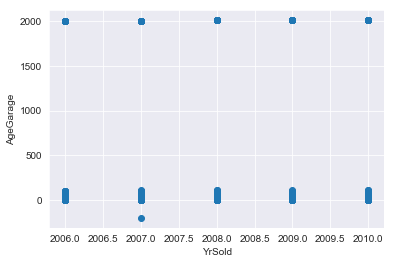

In [102]:
plt.scatter(x=combined['YrSold'], y=combined['AgeGarage'])
plt.xlabel('YrSold')
plt.ylabel('AgeGarage')
plt.show()

In [106]:
#In some cases Age of garage is ~2000, because of filling null values with zero.
#Here we will put a threshold value of 1000 to proceed
max_AgeGarage = np.max(combined.AgeGarage[combined.AgeGarage < 1000])
combined['AgeGarage'] = combined['AgeGarage'].map(lambda x: max_AgeGarage if x > 1000 else x)

In [107]:
#If there are any negative values, they will be replaced by zero
combined.Age = combined.Age.map(lambda x: 0 if x < 0 else x)
combined.AgeRemod = combined.AgeRemod.map(lambda x: 0 if x < 0 else x)
combined.AgeGarage = combined.AgeGarage.map(lambda x: 0 if x < 0 else x)
#Now we can drop the original time variables
combined.drop(['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1, inplace=True)
combined.drop('MoSold',axis=1,inplace=True)

# 3E) Data Transformation - Categorical variables to dummy columns

In [2]:
#MSZoning
MSZoning_dummies=pd.get_dummies(combined['MSZoning'], prefix='MSZoning_', drop_first=True)
combined=pd.concat([combined, MSZoning_dummies], axis=1)
combined.drop('MSZoning', axis=1, inplace=True)

NameError: name 'pd' is not defined

In [ ]:
#LotShape - This is not a rank variable because we can't conclude if one shape is better than the other
LotShape_dummies=pd.get_dummies(combined['LotShape'], prefix='LotShape_', drop_first=True)
combined=pd.concat([combined, LotShape_dummies], axis=1)
combined.drop('LotShape', axis=1, inplace=True)

In [ ]:
#LotConfig
LotConfig_dummies=pd.get_dummies(combined['LotConfig'], prefix='LotConfig_', drop_first=True)
combined=pd.concat([combined, LotConfig_dummies], axis=1)
combined.drop('LotConfig', axis=1, inplace=True)

In [ ]:
#LandContour
LandContour_dummies=pd.get_dummies(combined['LandContour'], prefix='LandContour_', drop_first=True)
combined=pd.concat([combined, LandContour_dummies], axis=1)
combined.drop('LandContour', axis=1, inplace=True)

In [ ]:
#MasVnrType
MasVnrType_dummies=pd.get_dummies(combined['MasVnrType'], prefix='MasVnrType_', drop_first=True)
combined=pd.concat([combined, MasVnrType_dummies], axis=1)
combined.drop('MasVnrType', axis=1, inplace=True)

In [ ]:
#Street
Street_dummies=pd.get_dummies(combined['Street'], prefix='Street_', drop_first=True)
combined=pd.concat([combined, Street_dummies], axis=1)
combined.drop('Street', axis=1, inplace=True)

In [ ]:
#Foundation
Foundation_dummies=pd.get_dummies(combined['Foundation'], prefix='Foundation_', drop_first=True)
combined=pd.concat([combined, Foundation_dummies], axis=1)
combined.drop('Foundation', axis=1, inplace=True)

In [ ]:
#Heating
Heating_dummies=pd.get_dummies(combined['Heating'], prefix='Heating_', drop_first=True)
combined=pd.concat([combined, Heating_dummies], axis=1)
combined.drop('Heating', axis=1, inplace=True)

In [ ]:
#LandSlope
LandSlope_dummies=pd.get_dummies(combined['LandSlope'], prefix='LandSlope_', drop_first=True)
combined=pd.concat([combined, LandSlope_dummies], axis=1)
combined.drop('LandSlope', axis=1, inplace=True)

In [ ]:
#Neighborhood
Neighborhood_dummies=pd.get_dummies(combined['Neighborhood'], prefix='Neighborhood_', drop_first=True)
combined=pd.concat([combined, Neighborhood_dummies], axis=1)
combined.drop('Neighborhood', axis=1, inplace=True)

In [ ]:
#Condition1
Condition1_dummies=pd.get_dummies(combined['Condition1'], prefix='Condition1_', drop_first=True)
combined=pd.concat([combined, Condition1_dummies], axis=1)
combined.drop('Condition1', axis=1, inplace=True)

In [ ]:
#Condition2
Condition2_dummies=pd.get_dummies(combined['Condition2'], prefix='Condition2_', drop_first=True)
combined=pd.concat([combined, Condition2_dummies], axis=1)
combined.drop('Condition2', axis=1, inplace=True)

In [ ]:
#RoofMatl
RoofMatl_dummies=pd.get_dummies(combined['RoofMatl'], prefix='RoofMatl_', drop_first=True)
combined=pd.concat([combined, RoofMatl_dummies], axis=1)
combined.drop('RoofMatl', axis=1, inplace=True)

In [ ]:
#RoofStyle
RoofStyle_dummies=pd.get_dummies(combined['RoofStyle'], prefix='RoofStyle_', drop_first=True)
combined=pd.concat([combined, RoofStyle_dummies], axis=1)
combined.drop('RoofStyle', axis=1, inplace=True)

In [ ]:
#Exterior1st
Exterior1st_dummies=pd.get_dummies(combined['Exterior1st'], prefix='Exterior1st_', drop_first=True)
combined=pd.concat([combined, Exterior1st_dummies], axis=1)
combined.drop('Exterior1st', axis=1, inplace=True)

In [ ]:
#Exterior2nd
Exterior2nd_dummies=pd.get_dummies(combined['Exterior2nd'], prefix='Exterior2nd_', drop_first=True)
combined=pd.concat([combined, Exterior2nd_dummies], axis=1)
combined.drop('Exterior2nd', axis=1, inplace=True)

In [ ]:
#BldgType
BldgType_dummies=pd.get_dummies(combined['BldgType'], prefix='BldgType_', drop_first=True)
combined=pd.concat([combined, BldgType_dummies], axis=1)
combined.drop('BldgType', axis=1, inplace=True)

In [ ]:
#HouseStyle
HouseStyle_dummies=pd.get_dummies(combined['HouseStyle'], prefix='HouseStyle_', drop_first=True)
combined=pd.concat([combined, HouseStyle_dummies], axis=1)
combined.drop('HouseStyle', axis=1, inplace=True)

In [ ]:
#SaleType
SaleType_dummies=pd.get_dummies(combined['SaleType'], prefix='SaleType_', drop_first=True)
combined=pd.concat([combined, SaleType_dummies], axis=1)
combined.drop('SaleType', axis=1, inplace=True)

In [ ]:
#SaleCondition
SaleCondition_dummies=pd.get_dummies(combined['SaleCondition'], prefix='SaleCondition_', drop_first=True)
combined=pd.concat([combined, SaleCondition_dummies], axis=1)
combined.drop('SaleCondition', axis=1, inplace=True)

In [ ]:
#MiscFeature
MiscFeature_dummies=pd.get_dummies(combined['MiscFeature'], prefix='MiscFeature_', drop_first=True)
combined=pd.concat([combined, MiscFeature_dummies], axis=1)
combined.drop('MiscFeature', axis=1, inplace=True)

In [ ]:
#MSSubClass
combined.MSSubClass = combined.MSSubClass.map({20:'class1', 30:'class2', 40:'class3',
                                               45:'class4', 50:'class5', 60:'class6',	
                                               70:'class7', 75:'class8', 80:'class9',
                                               85:'class10', 90:'class11', 120:'class12',	
                                               150:'class13', 160:'class14', 180:'class15',
                                               190:'class16'})
MSSubClass_dummies=pd.get_dummies(combined['MSSubClass'], prefix='MSSubClass_', drop_first=True)
combined=pd.concat([combined, MSSubClass_dummies], axis=1)
combined.drop('MSSubClass', axis=1, inplace=True)

In [ ]:
#Utilities - This column has same values throughout except one different value in training set
combined.drop('Utilities', axis=1, inplace=True)

# 3F) Data Transformation - Categorical variables to numerical values

In [ ]:
#Some of the categorical variables have rank values, hence easily transformable to numerical

combined.ExterQual = combined.ExterQual.map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
combined.ExterCond = combined.ExterCond.map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
combined.HeatingQC = combined.HeatingQC.map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
combined.CentralAir = combined.CentralAir.map({'Y':1, 'N':0})
combined.PavedDrive = combined.PavedDrive.map({'N':0, 'P':1, 'Y':2})
combined.Functional = combined.Functional.map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
combined.KitchenQual = combined.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
combined.Electrical = combined.Electrical.map({'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})

In [9]:
X_train = combined[:-1459]
y_train = targets
y_train = y_train.drop(index_drop).reset_index(drop=True)

In [ ]:
conda install -c anaconda py-xgboost

In [ ]:
xgb = XGBRegressor()

In [10]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [11]:
imp = pd.DataFrame(xgb.feature_importances_ ,columns = ['Importance'],index = X_train.columns)
imp = imp.sort_values(['Importance'], ascending = False)
print(imp)

                       Importance
GrLivArea                0.096886
LotArea                  0.077855
OverallQual              0.060554
OverallCond              0.051903
BsmtFinSF1               0.048443
TotalBsmtSF              0.038062
1stFlrSF                 0.034602
AgeRemod                 0.032872
GarageArea               0.031142
Age                      0.029412
BsmtUnfSF                0.027682
Functional               0.025952
AgeGarage                0.022491
OpenPorchSF              0.022491
2ndFlrSF                 0.017301
LotFrontage              0.017301
Neighborhood__Crawfor    0.017301
WoodDeckSF               0.015571
BsmtExposure             0.015571
Condition1__Norm         0.012111
ScreenPorch              0.012111
EnclosedPorch            0.010381
KitchenQual              0.010381
BsmtQual                 0.010381
SaleCondition__Normal    0.010381
HouseStyle__SLvl         0.008651
FireplaceQu              0.008651
GarageCars               0.008651
BsmtFinType1  

In [ ]:
#Define a function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true-y_pred)**2))

#Define a function to calculate negative RMSE (as a score)
def nrmse(y_true, y_pred):
    return -1.0*rmse(y_true, y_pred)

neg_rmse = make_scorer(nrmse)

rfecv = RFECV(estimator=xgb, step=1, cv=3, n_jobs=-1, scoring=neg_rmse)
rfecv = rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

#Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.xticks(np.arange(0,200,10))
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

features_kept = X.columns.values[rfecv.support_] 
X = X[features_kept]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

#Ridge Regressor

params_ridge ={
        'alpha':[0.25,0.5,1],
        'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
        }

ridge = Ridge()
ridge_random = RandomizedSearchCV(estimator = ridge, param_distributions = params_ridge,
                               n_iter=50, cv=5, n_jobs=-1,random_state=42, verbose=2)
ridge_random.fit(X_train, y_train)
print(ridge_random.best_params_)
print(ridge_random.best_score_)


ridge_grid = GridSearchCV(estimator = ridge, param_grid = params_ridge, 
                          cv = 5, n_jobs = -1, verbose = 2)

ridge_grid.fit(X_train, y_train)
print(ridge_grid.best_params_)
print(ridge_grid.best_score_)

#Lasso Regression

lasso = Lasso()
params_lasso={'alpha':[0.05,0.1,0.2,0.3,0.5,0.6,0.7,0.8,0.9,1]}
lasso_random = RandomizedSearchCV(estimator = lasso, param_distributions = params_lasso,
                               n_iter=50, cv=5, n_jobs=-1,random_state=42, verbose=2)
lasso_random.fit(X_train, y_train)
print(lasso_random.best_params_)
print(lasso_random.best_score_)


#XGBoost Regressor
params_boost ={
        'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
        'max_depth':[4,5,6,7,8,9,10],
        'min_child_weight':[1,3,5,7],
        'gamma':[0.1,0.2,0.3,0.4,0.5],
        'colsample_bytree':[0.3,0.4,0.5,0.7]}

xg_regressor = XGBRegressor()
xg_random = RandomizedSearchCV(estimator = xg_regressor, param_distributions = params_boost,
                               n_iter=50, cv=5, n_jobs=-1,random_state=42, verbose=2)
xg_random.fit(X_train, y_train)
print(xg_random.best_params_)
print(xg_random.best_score_)

xg_grid = GridSearchCV(estimator = xg_regressor, param_grid = params_boost, 
                          cv = 3, n_jobs = -1, verbose = 2)

xg_grid.fit(X_train, y_train)
print(xg_grid.best_params_)
print(xg_grid.best_score_)

#Random Forest Regressor

rf = RandomForestRegressor(random_state = 42)

#Hyperparamater tuning using RanodomSearchCV
print('Parameters currently in use:\n')
pprint(rf.get_params())
random_grid = { 
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,7,8,9,10],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5,
                               verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)
print(rf_random.best_score_)

#Hyperparameter tuning using GridSearchCV

param_grid = { 
    'n_estimators': [int(x) for x in np.linspace(start = 600, stop = 2000, num = 10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [7,8,9,10],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' : [1, 2]
}


grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

model = rf_random.best_estimator_
print("RMSE of the whole training set: {}".format(rmse(y_train, model.predict(X_train))))

model_grid = grid_search.best_estimator_
print("RMSE of the whole training set: {}".format(rmse(y_train, model_grid.predict(X_train))))

model_xg = xg_random.best_estimator_
print("RMSE of the whole training set: {}".format(rmse(y_train, model_xg.predict(X_train))))

model_ridge = ridge_random.best_estimator_
print("RMSE of the whole training set: {}".format(rmse(y_train, model_ridge.predict(X_train))))


#Test Set
X_test = combined[-1459:]
X_test = X_test[features_kept]

y_pred_ridge = np.exp(model_ridge.predict(X_test))
output_ridge = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred_ridge})
output_ridge.to_csv('prediction_ridge.csv', index=False)

y_pred_xg = np.exp(model_xg.predict(X_test))
output_xg = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred_xg})
output_xg.to_csv('prediction_xg.csv', index=False)

y_pred_grid = np.exp(model_grid.predict(X_test))
output_grid = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred_grid})
output_grid.to_csv('prediction_grid.csv', index=False)


y_submission_avg = (y_pred_ridge + y_pred_xg + y_pred_grid)/3

output_submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_submission_avg})

output_submission.to_csv('prediction.csv', index=False)



